In [1]:
from EarthquakeSignal import config, EarthquakeBatchProcessor


In [2]:
# pip list

### Set config manual 

In [3]:
config = {
    'file_extension': '.AT2',
    'unit_factor': 1,
    
    'apply_baseline_correction': True,
    'apply_arias_analysis': True,
    'apply_fourier_analysis': True,
    '_compute_newmark_spectra': True,
    'compute_rotd': True,
    'print_summary': True,
    
    'plot_signals': True,
    'plot_corrected_signals': False,
    'plot_arias_signals': False,
    'plot_fourier_signals': False,  
    'plot_newmark_spectra': True,
    'plot_rotd': True,
}


In [4]:
registers_path = r'data'


[WARNING] Signal 'RSN125_FRIULI.A_A-TMZ-UP.AT2' was padded with zeros to reach 7279 samples.
[WARNING] Signal 'RSN125_FRIULI.A_A-TMZ000.AT2' was padded with zeros to reach 7279 samples.

📌 Earthquake ID: None
Sampling interval (dt): 0.005000 s
Number of samples: 7279
Total duration: 36.40 s
Component information:
  - H1: file='RSN125_FRIULI.A_A-TMZ000.AT2', RMS=3.7448e-02
  - H2: file='RSN125_FRIULI.A_A-TMZ270.AT2', RMS=4.6303e-02
  - V: file='RSN125_FRIULI.A_A-TMZ-UP.AT2', RMS=2.4226e-02



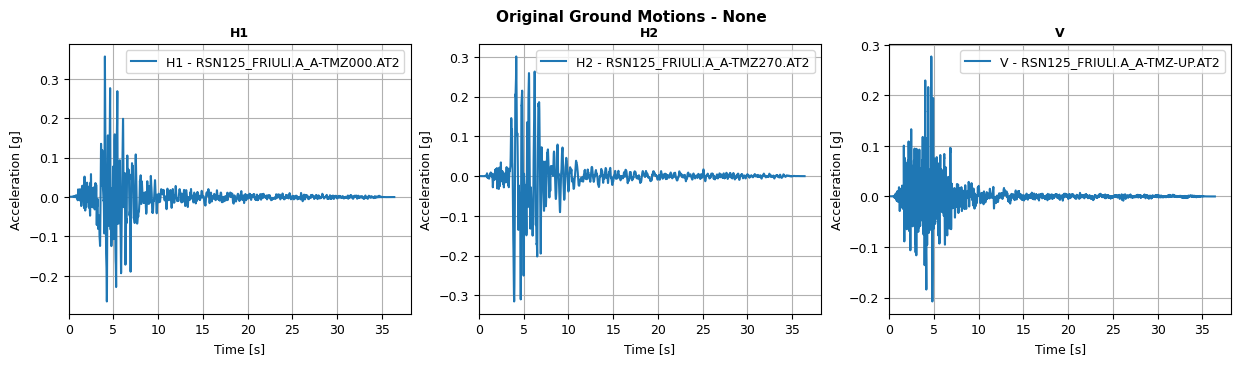

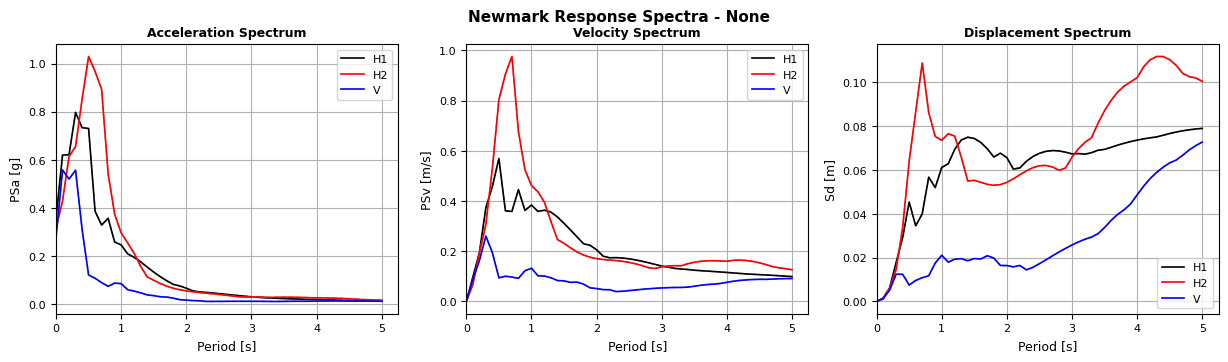

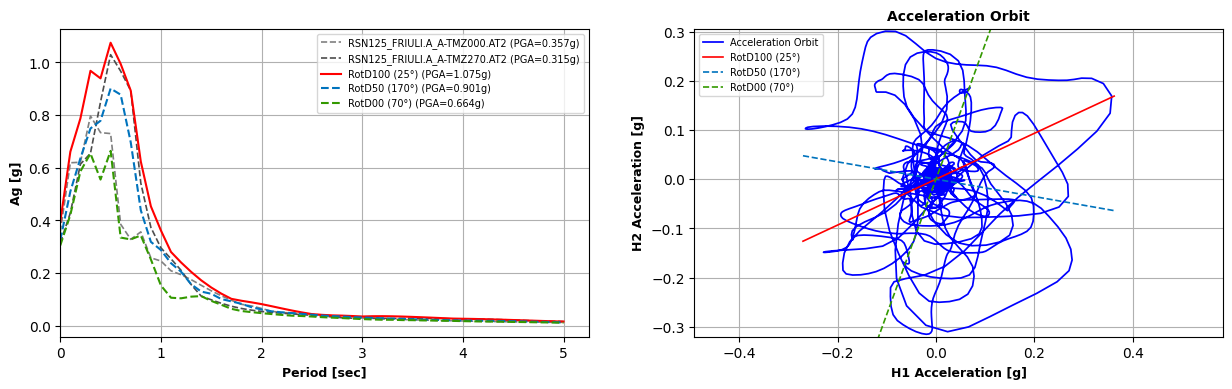

[WARNING] Signal 'RSN1_HELENA.A_A-HMC180.AT2' was padded with zeros to reach 5106 samples.
[WARNING] Signal 'RSN1_HELENA.A_A-HMC270.AT2' was padded with zeros to reach 5106 samples.

📌 Earthquake ID: None
Sampling interval (dt): 0.010000 s
Number of samples: 5106
Total duration: 51.06 s
Component information:
  - H1: file='RSN1_HELENA.A_A-HMC180.AT2', RMS=9.4050e-03
  - H2: file='RSN1_HELENA.A_A-HMC270.AT2', RMS=1.1218e-02
  - V: file='RSN1_HELENA.A_A-HMCDWN.AT2', RMS=6.4197e-03



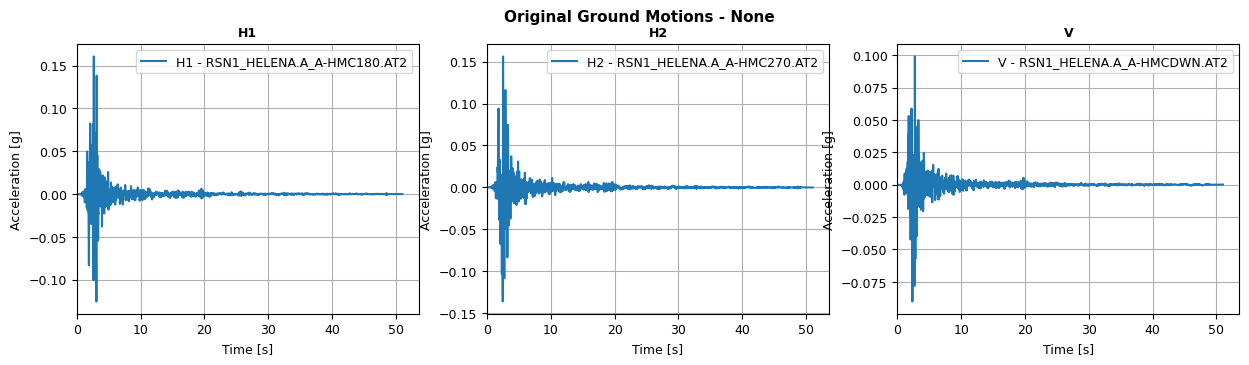

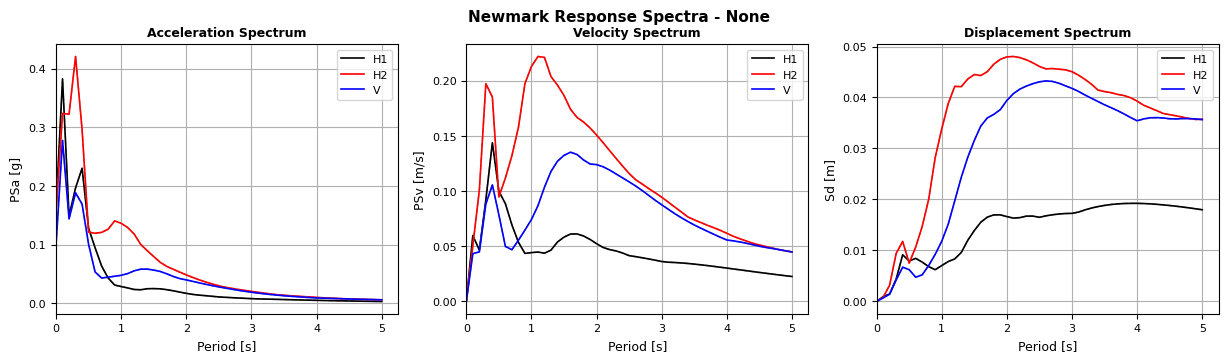

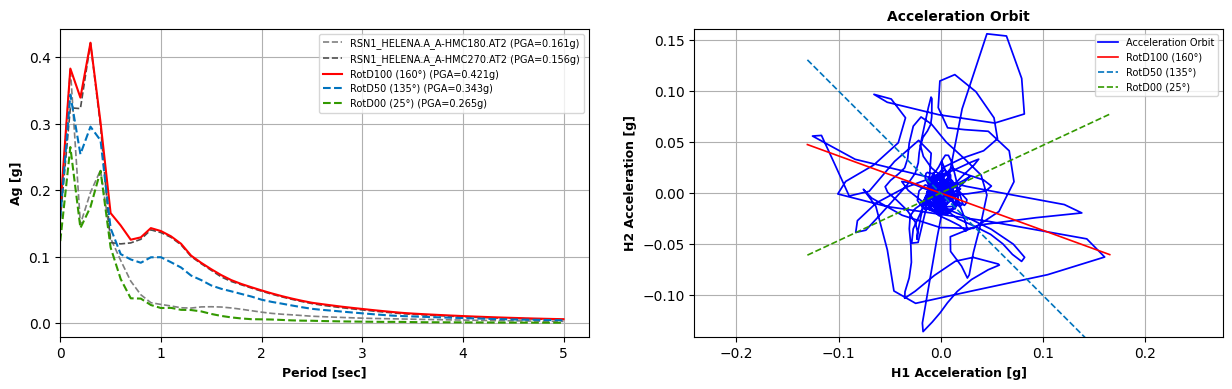


📌 Earthquake ID: None
Sampling interval (dt): 0.010000 s
Number of samples: 3668
Total duration: 36.68 s
Component information:
  - H1: file='RSN71_SFERN_L12291.AT2', RMS=3.7353e-02
  - H2: file='RSN71_SFERN_L12021.AT2', RMS=4.0524e-02
  - V: file='RSN71_SFERN_L12DWN.AT2', RMS=1.9214e-02



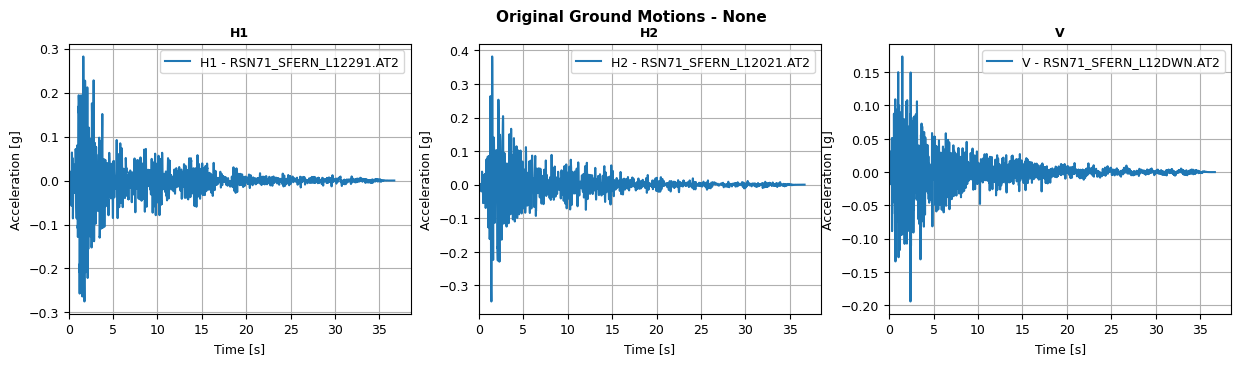

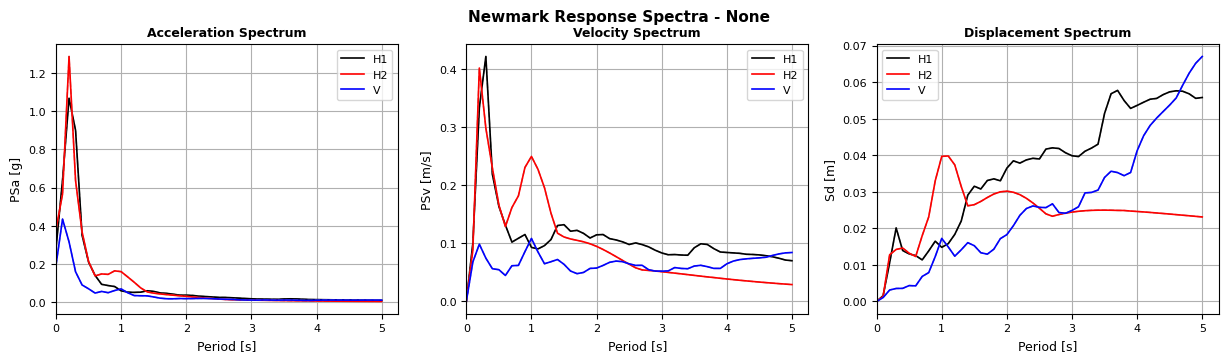

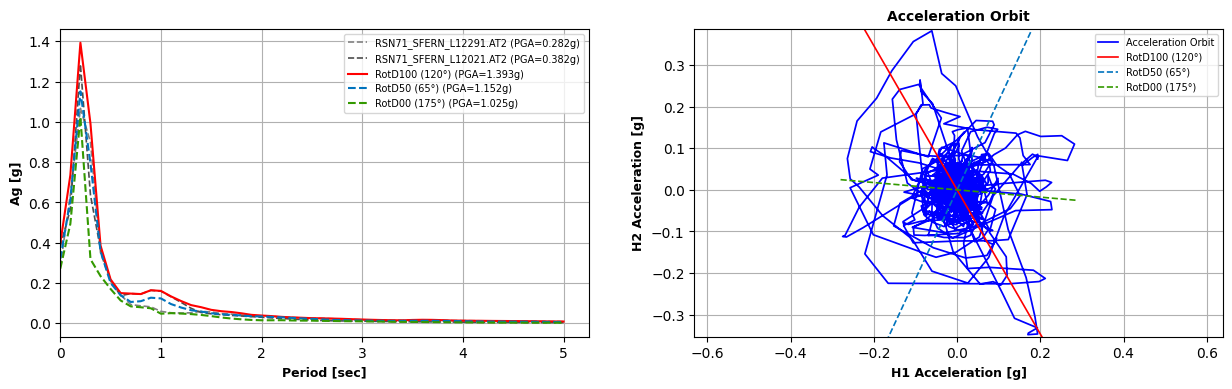

In [5]:
processor = EarthquakeBatchProcessor(registers_path, config)
earthquake = processor.process_all()


### For each earthquake


📌 Earthquake ID: None
Sampling interval (dt): 0.010000 s
Number of samples: 5106
Total duration: 51.06 s
Component information:
  - H1: file='RSN1_HELENA.A_A-HMC180.AT2', RMS=9.4050e-03
  - H2: file='RSN1_HELENA.A_A-HMC270.AT2', RMS=1.1218e-02
  - V: file='RSN1_HELENA.A_A-HMCDWN.AT2', RMS=6.4197e-03



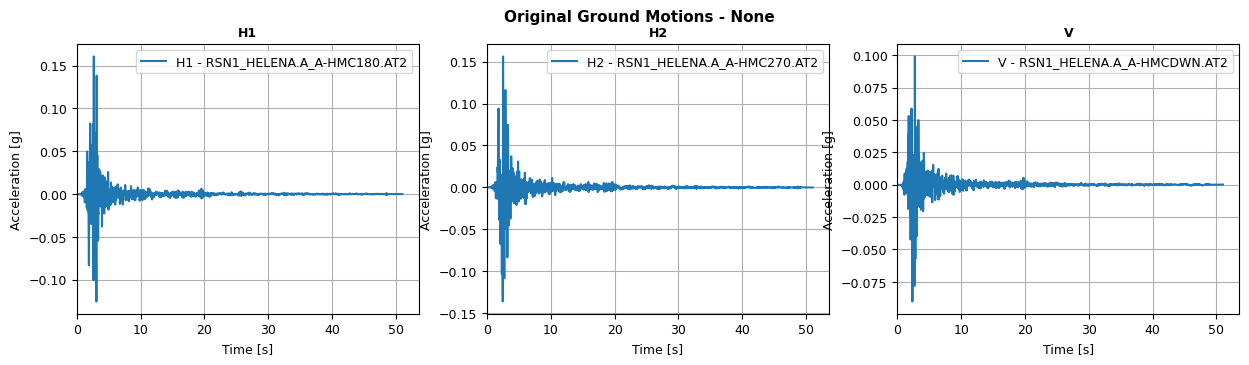

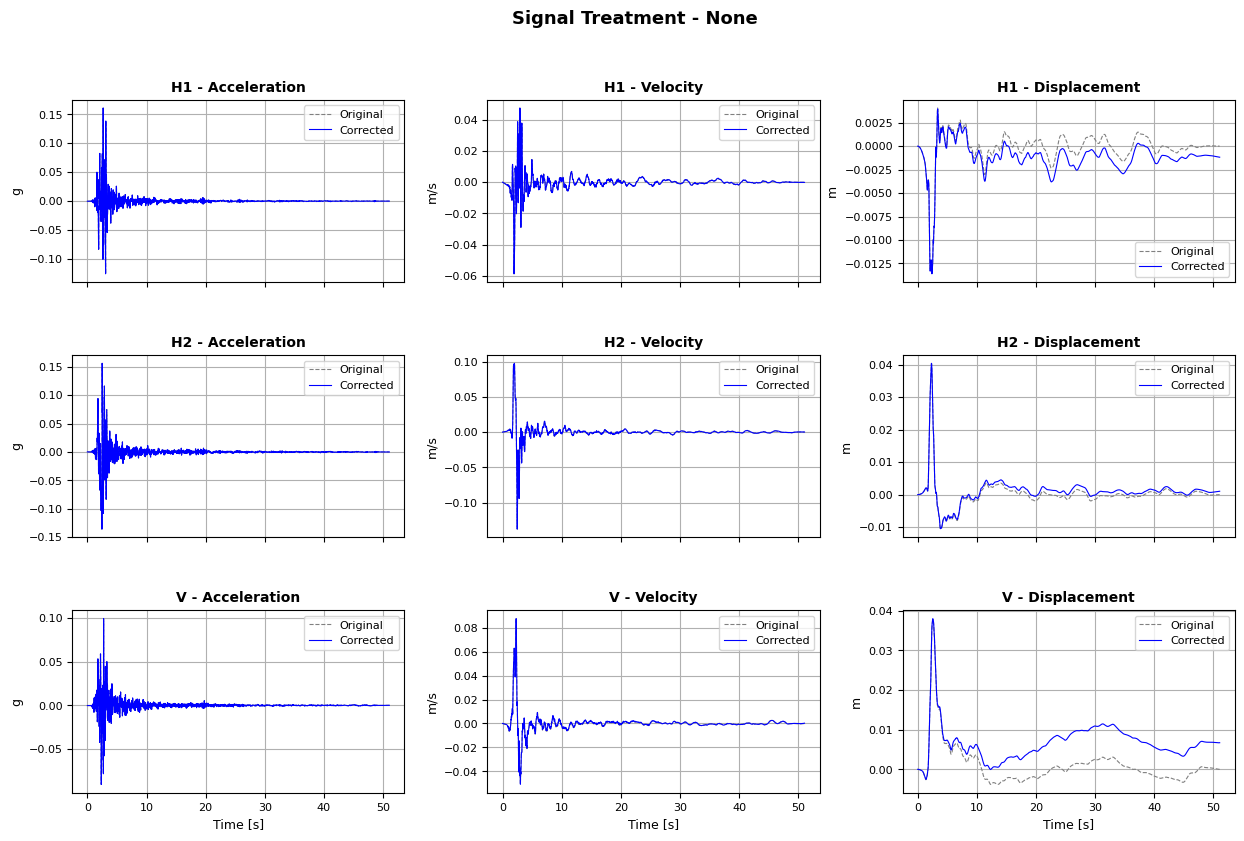

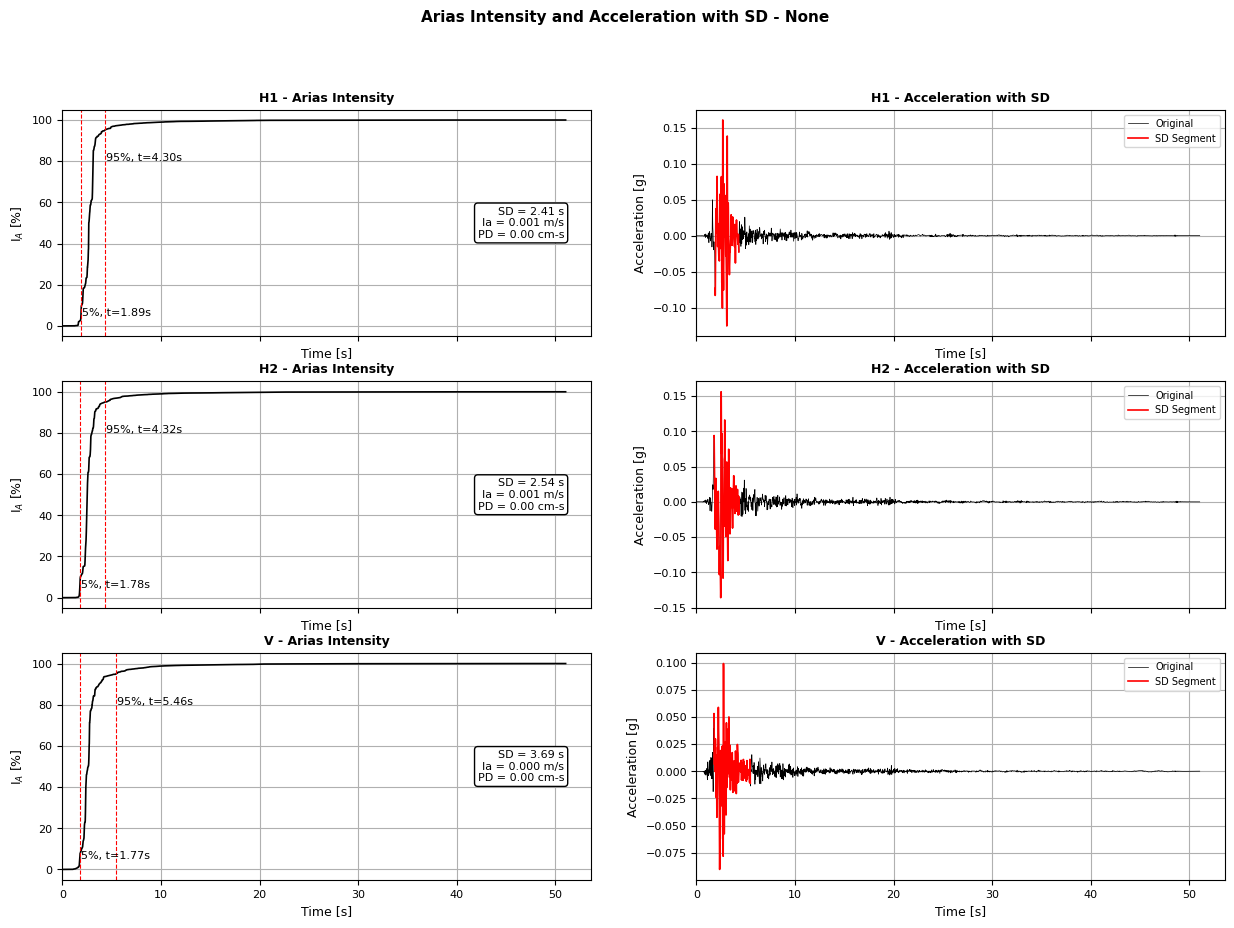

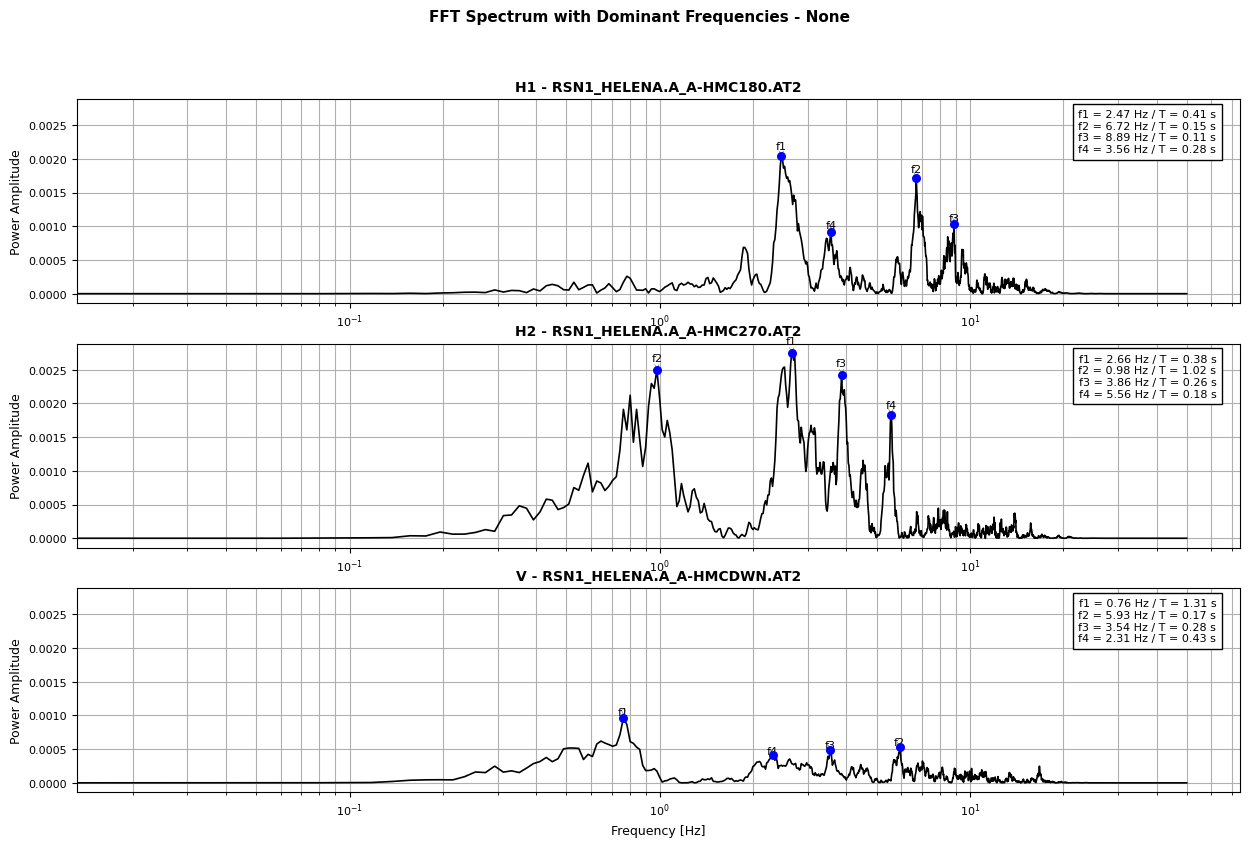

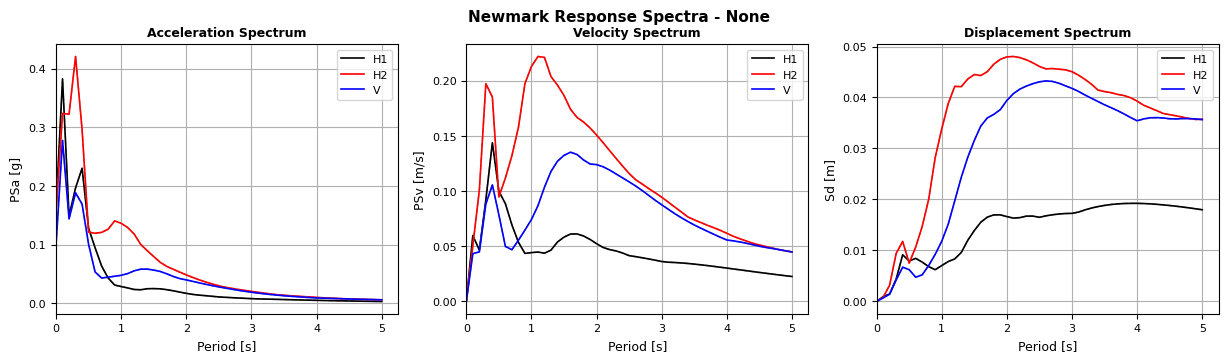

In [6]:
earthquake['RSN1'].print_summary()
earthquake['RSN1'].plot_original_signals()
earthquake['RSN1'].plot_corrected_signals()
earthquake['RSN1'].plot_arias_signals()
earthquake['RSN1'].plot_fourier_signals()
earthquake['RSN1'].plot_newmark_spectra()


In [7]:
record = earthquake['RSN1']


print("🔹 Arias Intensity")
print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


print("\n🔹 Fourier Analysis")
print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

🔹 Arias Intensity
Significant Duration Start  : 1.890 s
Significant Duration End    : 4.300 s
Total Arias Intensity       : 0.00072 m/s
Destructive Potential Index : 0.00001

🔹 Fourier Analysis
Dominant Periods (s): [0.4052381  0.14886297 0.11246696 0.28054945]


## Keys and Methods

In [8]:

first_key = next(iter(earthquake))
eq = earthquake[first_key]

print("Keys:")
for key in vars(eq):
    print(f"  - {key}")

print("\nMethods:")
import inspect
methods = [name for name, obj in inspect.getmembers(eq, inspect.ismethod) if not name.startswith('_')]
for m in methods:
    print(f"  - {m}()")

Keys:
  - filepath
  - config
  - name
  - dt
  - signals
  - component_names
  - corrected_acc
  - corrected_vel
  - corrected_disp
  - arias
  - newmark_spectra
  - rotd
  - fourier
  - summary_tool
  - plotter_tool
  - comparison_tool
  - arias_plotter
  - fourier_plotter
  - newmark_plotter
  - rotd_plotter
  - signals_raw

Methods:
  - load_and_process()
  - plot_arias_signals()
  - plot_corrected_signals()
  - plot_fourier_signals()
  - plot_newmark_spectra()
  - plot_original_signals()
  - plot_rotd()
  - print_summary()


### All spectra

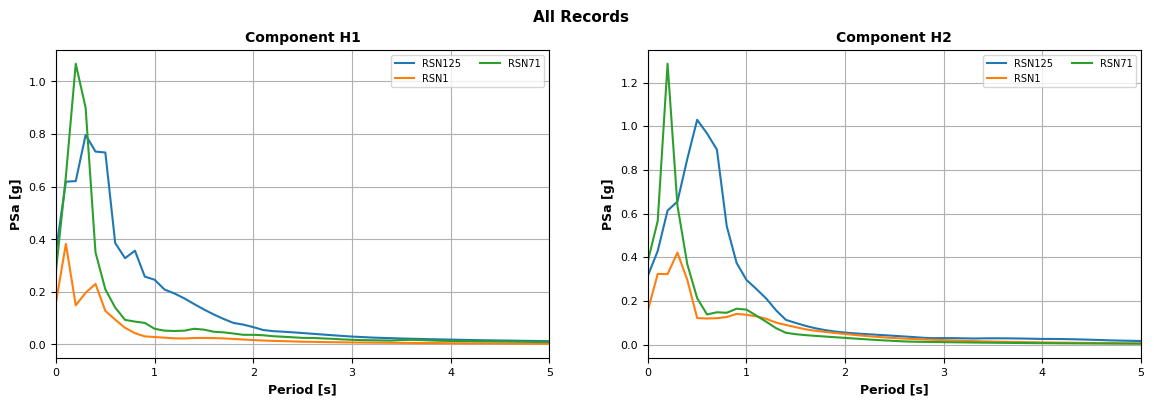

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with 1 row and 2 columns
plt.figure(figsize=(14, 4))

# Subplot for H1
plt.subplot(1, 2, 1)
for rsn, eq in earthquake.items():
    try:
        T_H1 = eq.newmark_spectra['H1']['T']
        PSa_H1 = eq.newmark_spectra['H1']['PSa']
        plt.plot(T_H1, PSa_H1, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H1 spectrum")

plt.title("Component H1", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0,right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Subplot for H2
plt.subplot(1, 2, 2)
for rsn, eq in earthquake.items():
    try:
        T_H2 = eq.newmark_spectra['H2']['T']
        PSa_H2 = eq.newmark_spectra['H2']['PSa']
        plt.plot(T_H2, PSa_H2, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H2 spectrum")

plt.title("Component H2", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0,right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Super title
plt.suptitle("All Records", fontsize=11, fontweight='bold')
plt.show()


### Rotd100

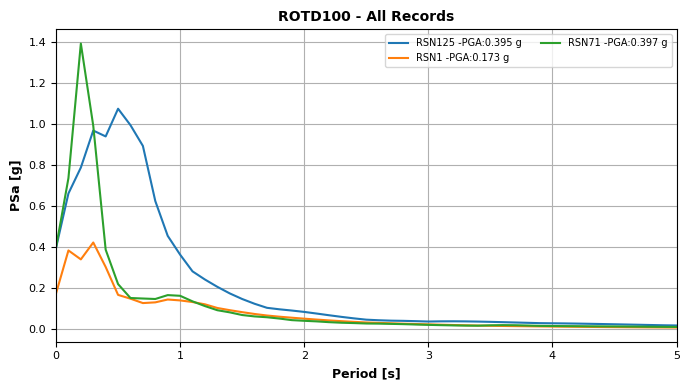

In [10]:


# Create figure with 1 row and 1 column
plt.figure(figsize=(7, 4))

# Subplot for ROTD100
plt.subplot(1, 1, 1)
for rsn, eq in earthquake.items():
    try:

        T = eq.rotd['T']
        PSa_rotd100 = eq.rotd['ROTD100']
        pga = round(PSa_rotd100[0], 3)
        plt.plot(T, PSa_rotd100, linewidth=1.5, label=f"{rsn} -PGA:{pga} g")
    except KeyError:
        print(f"Warning: {rsn} missing ROTD100 spectrum")

plt.title("ROTD100 - All Records", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()
